In [25]:
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#Tot(total)data preparation
tot=pd.read_csv(r'C:\Users\jisaa\Desktop\201809-capitalbikeshare-tripdata.csv')
tot.columns=['Duration','StartDate','EndDate',
            'StartStationNumber','StartStation','EndStationNumber',
            'EndStation','BikeNumber','MemberType']
tot['StartDateOnly']=tot['StartDate'].str.replace(' [0-9]{2}:[0-9]{2}:[0-9]{2}', '', regex=True)
tot['StartDateOnly']=pd.to_datetime(tot['StartDateOnly'], format='%Y-%m-%d')
tot['StartDateOnly']=tot['StartDateOnly'].dt.strftime('%B-%d')
tot['StartDate']=pd.to_datetime(tot['StartDate'], format='%Y-%m-%d %H:%M:%S')
tot['returntosameplace']=tot['StartStationNumber']==tot['EndStationNumber']
#mem & cas (member & casual) data preparation
mem=tot.loc[lambda x:tot['MemberType']=='Member',:]
cas=tot.loc[lambda x:tot['MemberType']=='Casual',:]
mem=mem.reset_index(drop=True)
cas=cas.reset_index(drop=True)
#strtst & bike (top 10 startstation duration by tot,mem,cas and Bike) preparation
#startstation
totstrtst=tot.groupby(['StartStationNumber']).size().reset_index(name='counts')
totstrtst=totstrtst[['counts']]
totstrtst=totstrtst.sort_values(['counts'],ascending=False)
totstrtst=totstrtst[0:9]
memstrtst=mem.groupby(['StartStationNumber']).size().reset_index(name='counts')
memstrtst=memstrtst[['counts']]
memstrtst=memstrtst.sort_values(['counts'],ascending=False)
memstrtst=memstrtst[0:9]
casstrtst=cas.groupby(['StartStationNumber']).size().reset_index(name='counts')
casstrtst=casstrtst[['counts']]
casstrtst=casstrtst.sort_values(['counts'],ascending=False)
casstrtst=casstrtst[0:9]
#bikenum
bike=tot.groupby(['BikeNumber']).sum()
bike=bike[['Duration']]
bike=bike.sort_values(['Duration'],ascending=False)
bike=bike[0:9]
strtdate=tot.groupby(['StartDateOnly','MemberType']).size().reset_index(name='counts')

#graph color scheme
colorlist=['#DB7093','#00008B','#00BFFF']
plt.style.use='bmh'

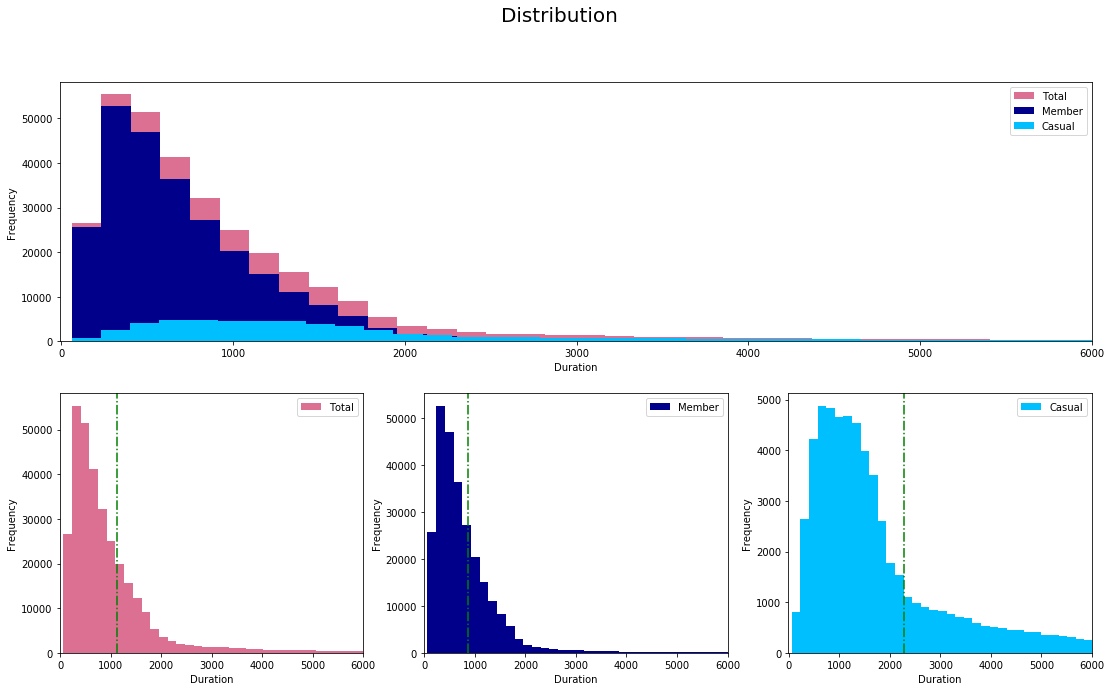

In [28]:
#graph1 values
g1totduration=tot['Duration'].values
g1memduration=mem['Duration'].values
g1casduration=cas['Duration'].values
g1ch2liney1=tot['Duration'].mean()
g1ch2liney2=mem['Duration'].mean()
g1ch2liney3=cas['Duration'].mean()
# graph_1
fig = plt.figure()
fig.suptitle("Distribution",fontsize=20)
fig.set_size_inches(18.5, 10.5)

g1chrt1,g1chrt2,g1chrt3,g1chrt4=plt.subplot(211),plt.subplot(234),plt.subplot(235),plt.subplot(236)
g1chrt1.hist(g1totduration,bins=500,color=colorlist[0],alpha=1,label='Total')
g1chrt1.hist(g1memduration,bins=500,color=colorlist[1],alpha=1,label='Member')
g1chrt1.hist(g1casduration,bins=500,color=colorlist[2],alpha=1,label='Casual')
g1chrt1.set_xlim(-10,6000)
g1chrt1.set_xlabel('Duration')
g1chrt1.set_ylabel('Frequency')
g1chrt1.legend()
g1chrt2.hist(g1totduration,bins=500,color=colorlist[0],alpha=1,label='Total')
g1chrt2.set_xlim(-10,6000)
g1chrt2.axvline(x=g1ch2liney1, color='g', linestyle='-.')
g1chrt2.set_xlabel('Duration')
g1chrt2.set_ylabel('Frequency')
g1chrt2.legend()
g1chrt3.hist(g1memduration,bins=500,color=colorlist[1],alpha=1,label='Member')
g1chrt3.set_xlim(-10,6000)
g1chrt3.axvline(x=g1ch2liney2, color='g', linestyle='-.')
g1chrt3.set_xlabel('Duration')
g1chrt3.set_ylabel('Frequency')
g1chrt3.legend()
g1chrt4.hist(g1casduration,bins=500,color=colorlist[2],alpha=1,label='Casual')
g1chrt4.set_xlim(-10,6000)
g1chrt4.axvline(x=g1ch2liney3, color='g', linestyle='-.')
g1chrt4.set_xlabel('Duration')
g1chrt4.set_ylabel('Frequency')
g1chrt4.legend()
plt.savefig(r'C:\Users\jisaa\Desktop\out.png')
plt.show()

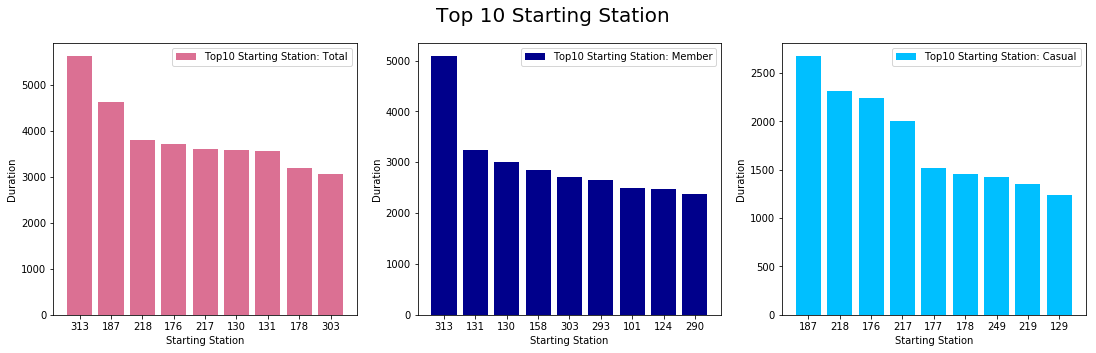

In [18]:
# graph_2 values
g2totstrtst=totstrtst.index.format()
g2totstrtstcount=totstrtst['counts'].values
g2memstrtst=memstrtst.index.format()
g2memstrtstcount=memstrtst['counts'].values
g2casstrtst=casstrtst.index.format()
g2casstrtstcount=casstrtst['counts'].values

# graph_2
fig2=plt.figure()
fig2.suptitle("Top 10 Starting Station",fontsize=20)
fig2.set_size_inches(18.5, 5)

g2chrt1,g2chrt2,g2chrt3=plt.subplot(131),plt.subplot(132),plt.subplot(133)
g2chrt1.bar(x=g2totstrtst,height=g2totstrtstcount,color=colorlist[0],
            label="Top10 Starting Station: Total")
g2chrt1.set_xlabel('Starting Station')
g2chrt1.set_ylabel('Duration')
g2chrt1.legend()
g2chrt2.bar(x=g2memstrtst,height=g2memstrtstcount,color=colorlist[1],
            label="Top10 Starting Station: Member")
g2chrt2.set_xlabel('Starting Station')
g2chrt2.set_ylabel('Duration')
g2chrt2.legend()
g2chrt3.bar(x=g2casstrtst,height=g2casstrtstcount,color=colorlist[2],
            label="Top10 Starting Station: Casual")
g2chrt3.set_xlabel('Starting Station')
g2chrt3.set_ylabel('Duration')
g2chrt3.legend()

plt.savefig(r'C:\Users\jisaa\Desktop\out1.png')
plt.show()


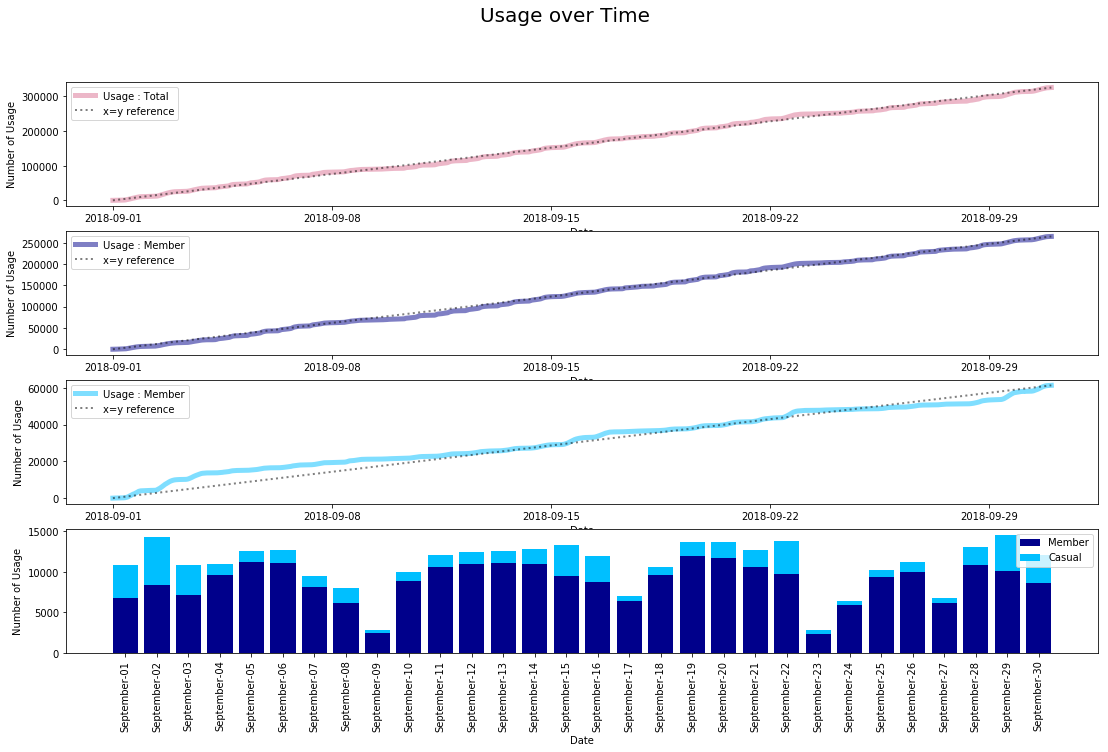

In [57]:
# graph_2 values
g3totstrtdate=tot['StartDate'].values
g3memstrtdate=mem['StartDate'].values
g3casstrtdate=cas['StartDate'].values
g3totstrtdatecount=tot.index.values
g3memstrtdatecount=mem.index.values
g3casstrtdatecount=cas.index.values
g3strtdateonly=tot.groupby(['StartDateOnly']).size().rename("Count").reset_index()
g3strtdateonly=g3strtdateonly["StartDateOnly"].values
g3strtdateonlymem=mem.groupby(['StartDateOnly']).size().rename("Count").reset_index()
g3strtdateonlymem=g3strtdateonlymem["Count"]
g3strtdateonlycas=cas.groupby(['StartDateOnly']).size().rename("Count").reset_index()
g3strtdateonlycas=g3strtdateonlycas["Count"]

#graph3
fig3=plt.figure()
fig3.suptitle("Usage over Time",fontsize=20)
fig3.set_size_inches(18.5, 10.5)

g3chrt1,g3chrt2,g3chrt3,g3chrt4=plt.subplot(411),plt.subplot(412),plt.subplot(413),plt.subplot(414)
g3chrt1.plot(g3totstrtdate,g3totstrtdatecount,color='#DB7093',
            alpha=0.5,label="Usage : Total",linewidth=5)
g3chrt1.plot([g3totstrtdate.min(),g3totstrtdate.max()],[g3totstrtdatecount.min(),g3totstrtdatecount.max()],
           color='k',ls=':',alpha=0.5,label="x=y reference",linewidth=2)
g3chrt1.set_xlabel('Date')
g3chrt1.set_ylabel('Number of Usage')
g3chrt1.legend()
g3chrt2.plot(g3memstrtdate,g3memstrtdatecount,color='#00008B',
             alpha=0.5,label="Usage : Member",linewidth=5)
g3chrt2.plot([g3memstrtdate.min(),g3memstrtdate.max()],[g3memstrtdatecount.min(),g3memstrtdatecount.max()],
             color='k',ls=':',alpha=0.5,label="x=y reference",linewidth=2)
g3chrt2.set_xlabel('Date')
g3chrt2.set_ylabel('Number of Usage')
g3chrt2.legend()
g3chrt3.plot(g3casstrtdate,g3casstrtdatecount,color='#00BFFF',
             alpha=0.5,label="Usage : Member",linewidth=5)
g3chrt3.plot([g3casstrtdate.min(),g3casstrtdate.max()],[g3casstrtdatecount.min(),g3casstrtdatecount.max()],
              color='k',ls=':',alpha=0.5,label="x=y reference",linewidth=2)
g3chrt3.set_xlabel('Date')
g3chrt3.set_ylabel('Number of Usage')
g3chrt3.legend()
g3chrt4.bar(g3strtdateonly,g3strtdateonlymem,color='#00008B',label="Member")
g3chrt4.bar(g3strtdateonly,g3strtdateonlycas,color='#00BFFF',bottom=g3strtdateonlymem, label="Casual")
g3chrt4.set_xlabel('Date')
plt.xticks(g3strtdateonly, rotation='vertical')
g3chrt4.set_ylabel('Number of Usage')
g3chrt4.legend()

plt.savefig(r'C:\Users\jisaa\Desktop\out2.png')
plt.show()

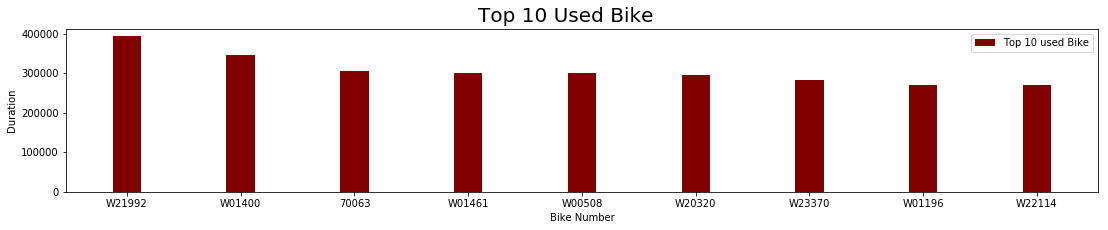

In [58]:
# graph4 values
g4bikenum=bike.index.values
g4bikenumduration=bike["Duration"].values
#graph4
fig4=plt.figure()
fig4.suptitle("Top 10 Used Bike",fontsize=20)
fig4.set_size_inches(18.5,3)

g4chrt1=plt.subplot(111)
g4chrt1.bar(g4bikenum,g4bikenumduration,color='#800000',width=0.25,label="Top 10 used Bike")

g4chrt1.set_xlabel('Bike Number')
g4chrt1.set_ylabel('Duration')
g4chrt1.legend()
plt.savefig(r'C:\Users\jisaa\Desktop\out3.png')
plt.show()

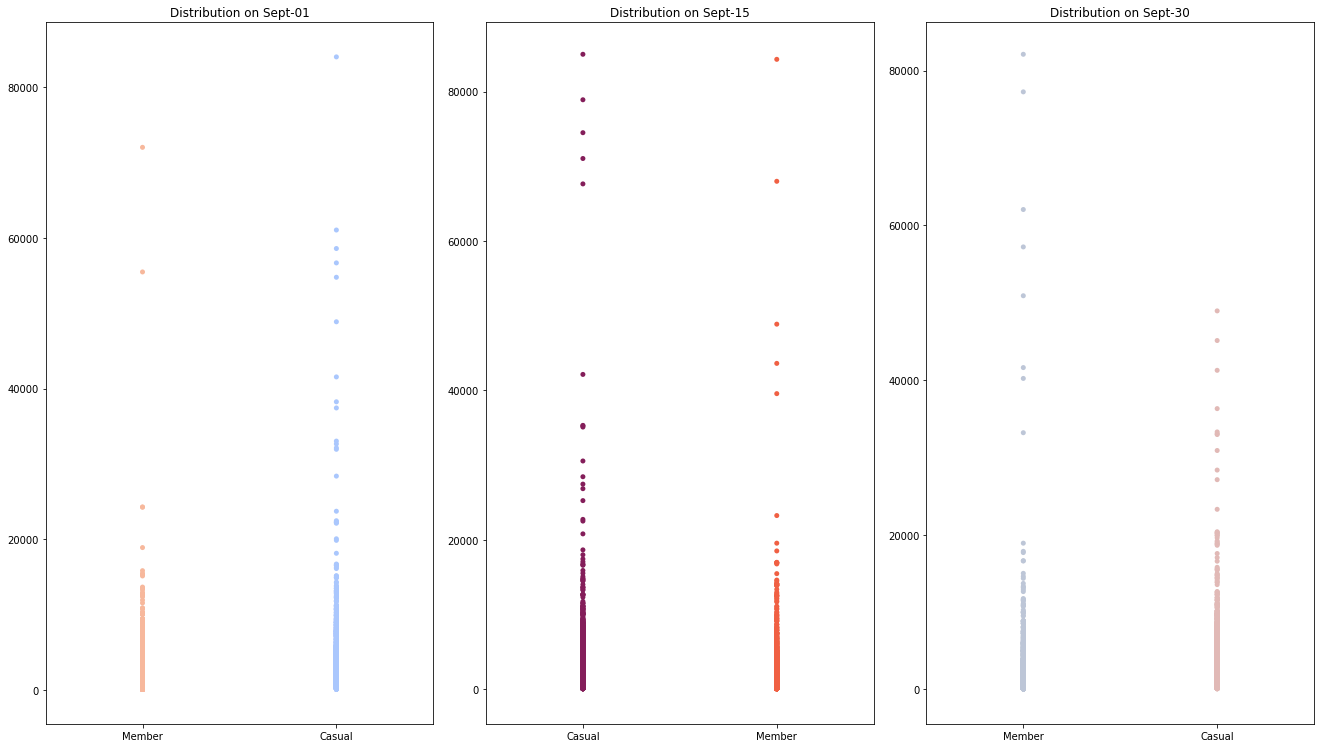

In [86]:
sept1tot=tot.loc[lambda x:tot['StartDateOnly']=='September-01',:].reset_index(drop=True)
duration1=sept1tot["Duration"].values
membertype1=sept1tot["MemberType"].values

sept15tot=tot.loc[lambda x:tot['StartDateOnly']=='September-15',:].reset_index(drop=True)
duration2=sept15tot["Duration"].values
membertype2=sept15tot["MemberType"].values

sept30tot=tot.loc[lambda x:tot['StartDateOnly']=='September-30',:].reset_index(drop=True)
duration3=sept30tot["Duration"].values
membertype3=sept30tot["MemberType"].values


fig5=plt.figure()
fig5.set_size_inches(18.5,10.5)
g5chrt1=plt.subplot(131)
g5chrt1.set_title("Distribution on Sept-01")
sns.stripplot(x=membertype1,y=duration1,palette="coolwarm_r")
g5chrt2=plt.subplot(132)
g5chrt2.set_title("Distribution on Sept-15")
sns.stripplot(x=membertype2,y=duration2,palette="rocket")
g5chrt3=plt.subplot(133)
g5chrt3.set_title("Distribution on Sept-30")
sns.stripplot(x=membertype3,y=duration3,palette="vlag")


sameplacesept15tot=sept15tot["returntosameplace"].values
usage=sept15tot.index.values
sns.barplot
plt.tight_layout()
plt.show()
